# Import the important library and exploring the dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [3]:
#importing the dataset
df=pd.read_csv("air_traffic_passenger_statistics.csv")

In [4]:
#checking the head of the data
df.head()

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   activity_period              15007 non-null  int64 
 1   operating_airline            15007 non-null  object
 2   operating_airline_iata_code  14953 non-null  object
 3   published_airline            15007 non-null  object
 4   published_airline_iata_code  14953 non-null  object
 5   geo_summary                  15007 non-null  object
 6   geo_region                   15007 non-null  object
 7   activity_type_code           15007 non-null  object
 8   price_category_code          15007 non-null  object
 9   terminal                     15007 non-null  object
 10  boarding_area                15007 non-null  object
 11  passenger_count              15007 non-null  int64 
 12  adjusted_activity_type_code  15007 non-null  object
 13  adjusted_passenger_count     15

# Identifying Missing Data and dealing with them.

In [6]:
# Check for the null values 
df.isna().apply(pd.value_counts)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
False,15007.0,15007.0,14953,15007.0,14953,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0
True,NaN,NaN,54,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isna().apply(pd.value_counts)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
False,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953


# Creating visual methods to analyze the data

In [10]:
#check the correlation of the data
df.corr()

,activity_period,passenger_count,adjusted_passenger_count,year
activity_period,1.000000,0.061160,0.060188,0.999940
passenger_count,0.061160,1.000000,0.999941,0.060917
adjusted_passenger_count,0.060188,0.999941,1.000000,0.059946
year,0.999940,0.060917,0.059946,1.000000


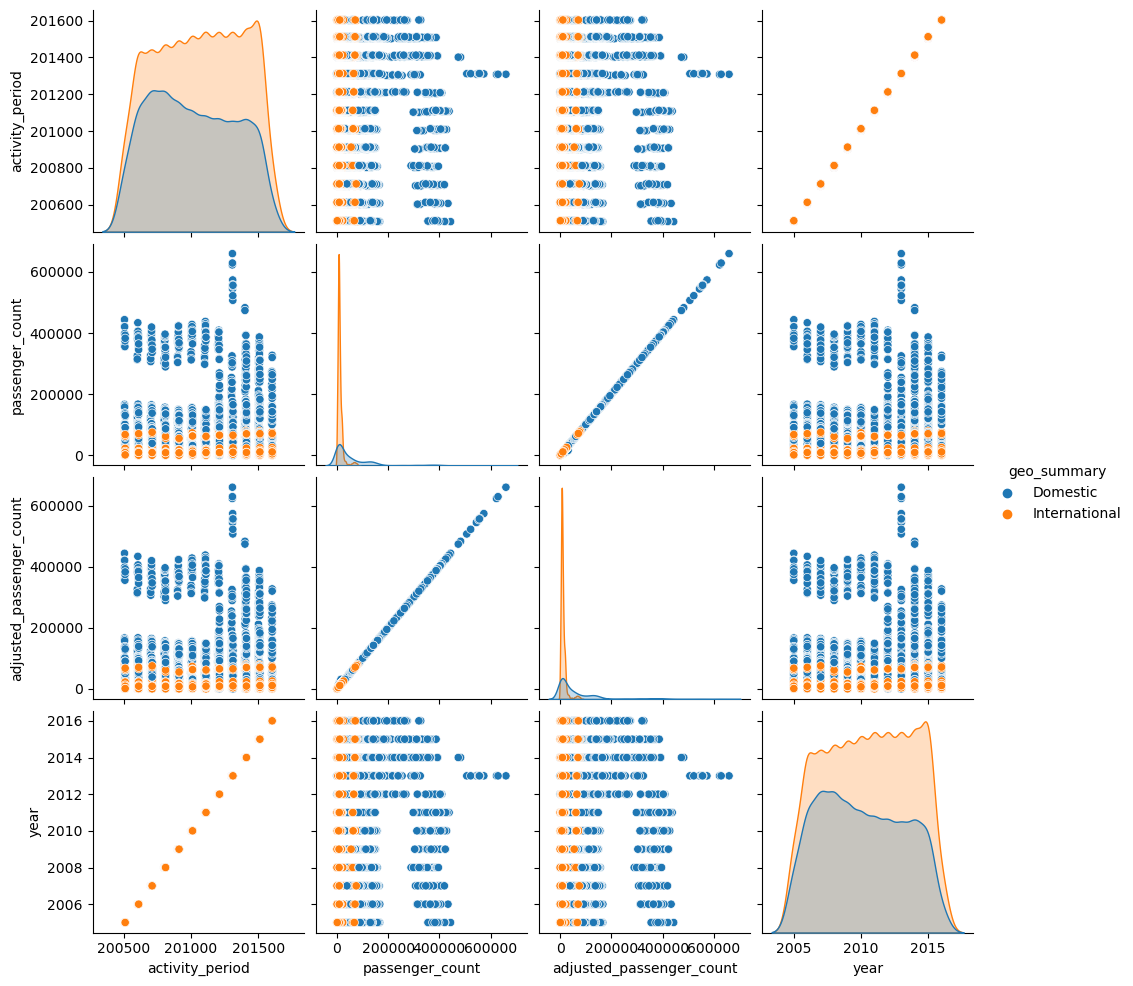

In [13]:
sns.pairplot(df,hue='geo_summary')

array([[<AxesSubplot:title={'center':'activity_period'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'adjusted_passenger_count'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

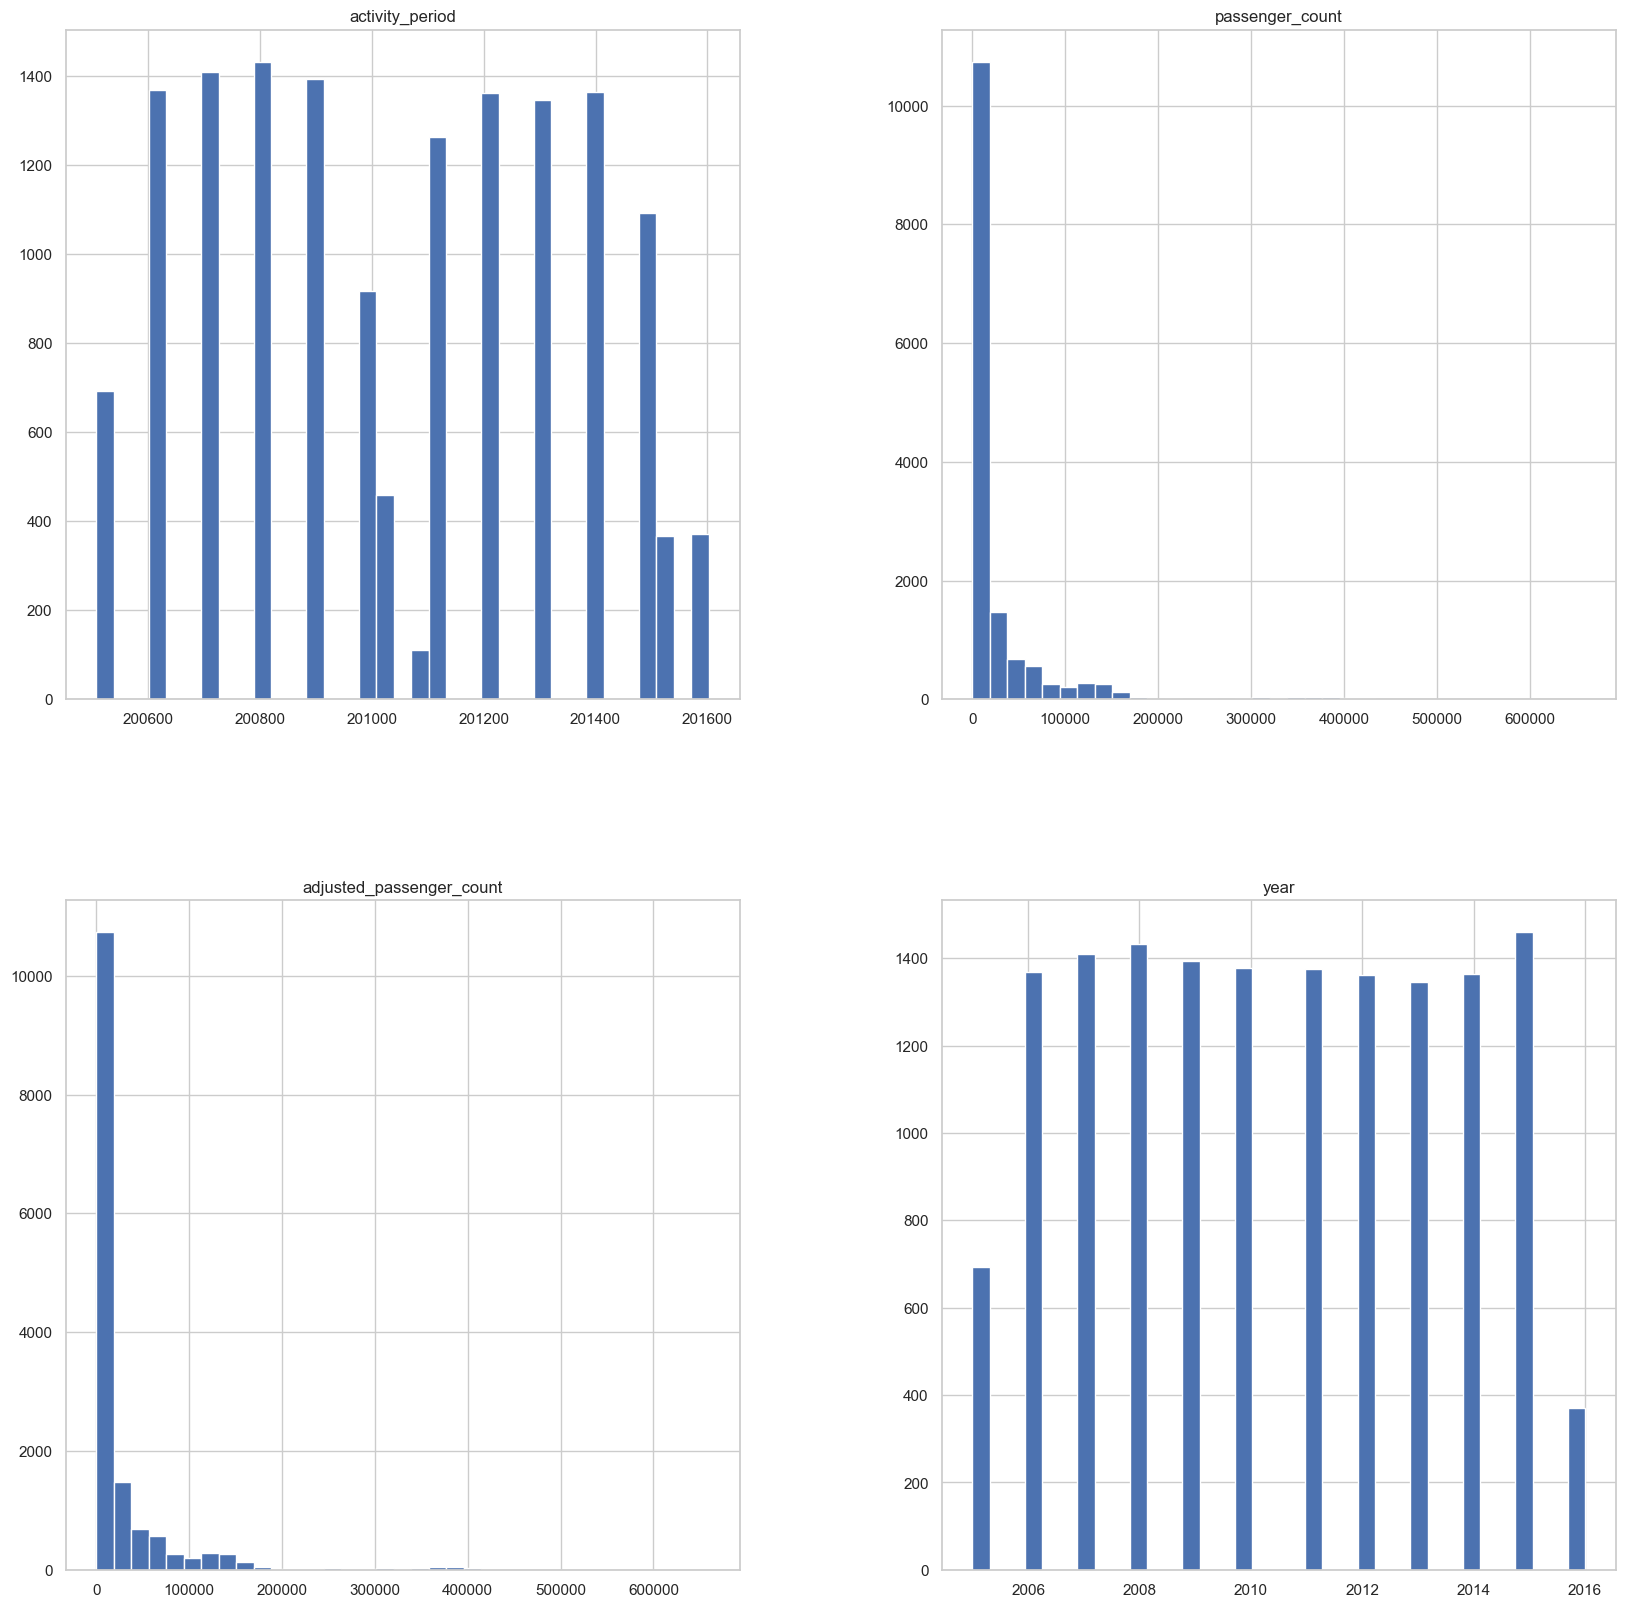

In [34]:
df.hist(bins=35,figsize=(20,20), color='b')

C:\Users\alial\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='geo_summary', ylabel='count'>

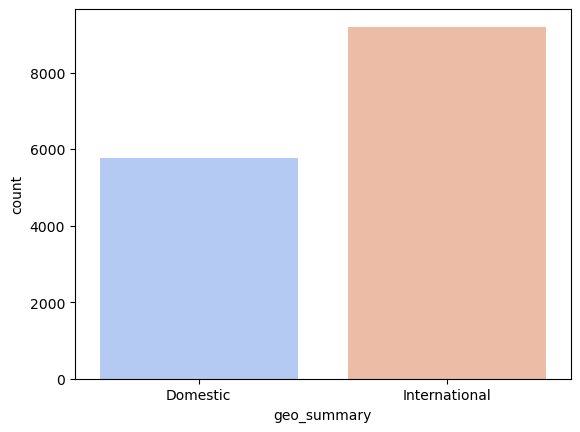

In [15]:
sns.countplot('geo_summary',data=df,palette='coolwarm')

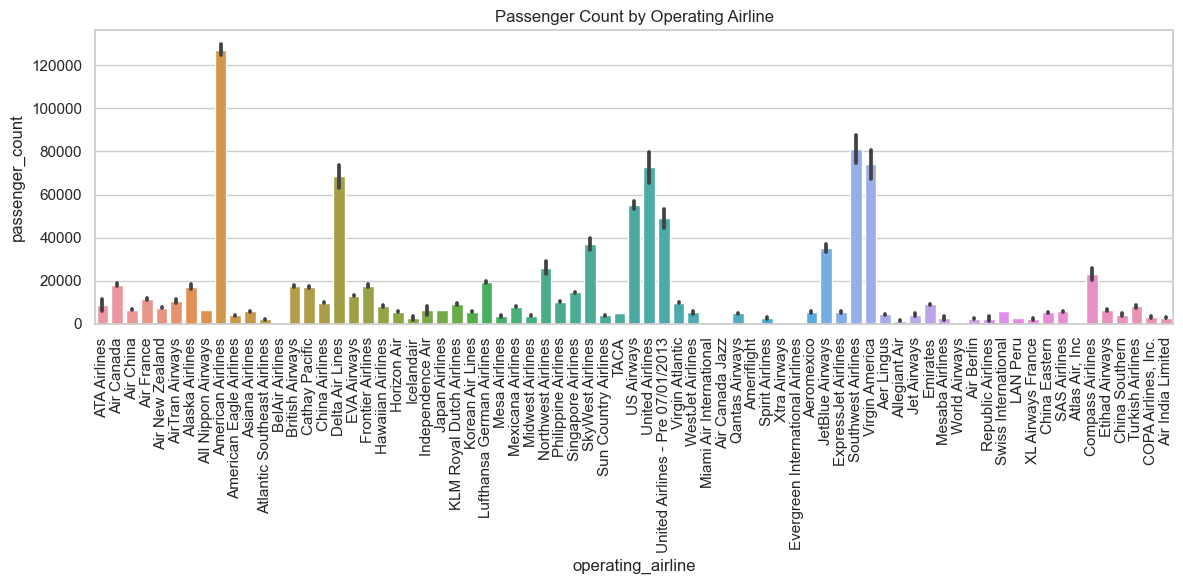

In [16]:
# Set the style for the plots
sns.set(style="whitegrid")

# Bar Plot: Passenger Count by Operating Airline
plt.figure(figsize=(12, 6))
sns.barplot(x="operating_airline", y="passenger_count", data=df)
plt.title('Passenger Count by Operating Airline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

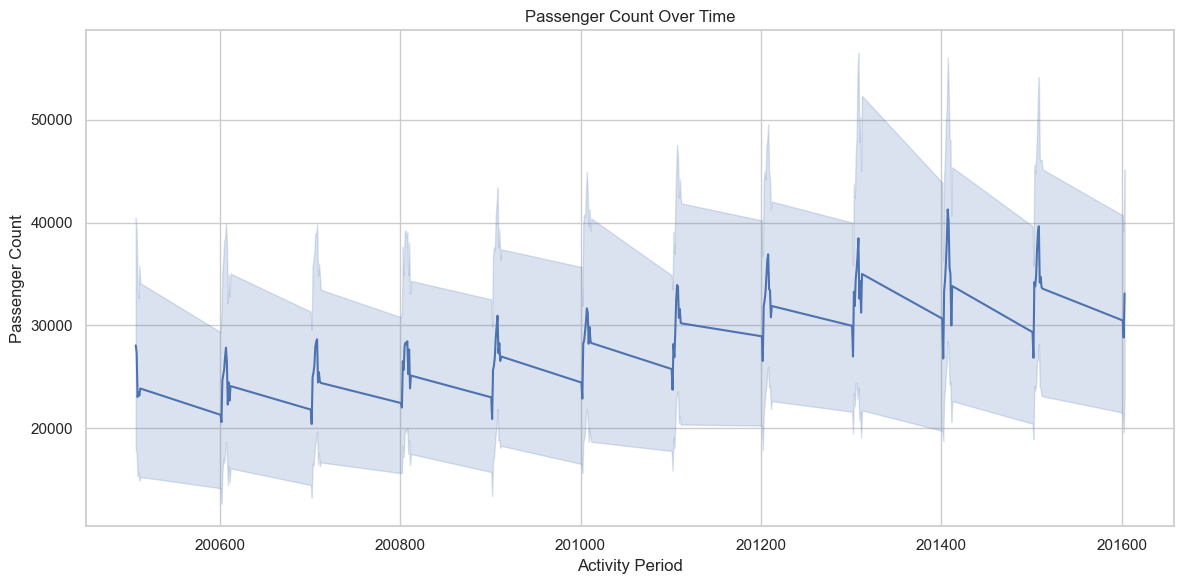

In [18]:
# Set the style for the plots
sns.set(style="whitegrid")
# Line Plot: Passenger Count Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="activity_period", y="passenger_count", data=df)
plt.title('Passenger Count Over Time')
plt.xlabel('Activity Period')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

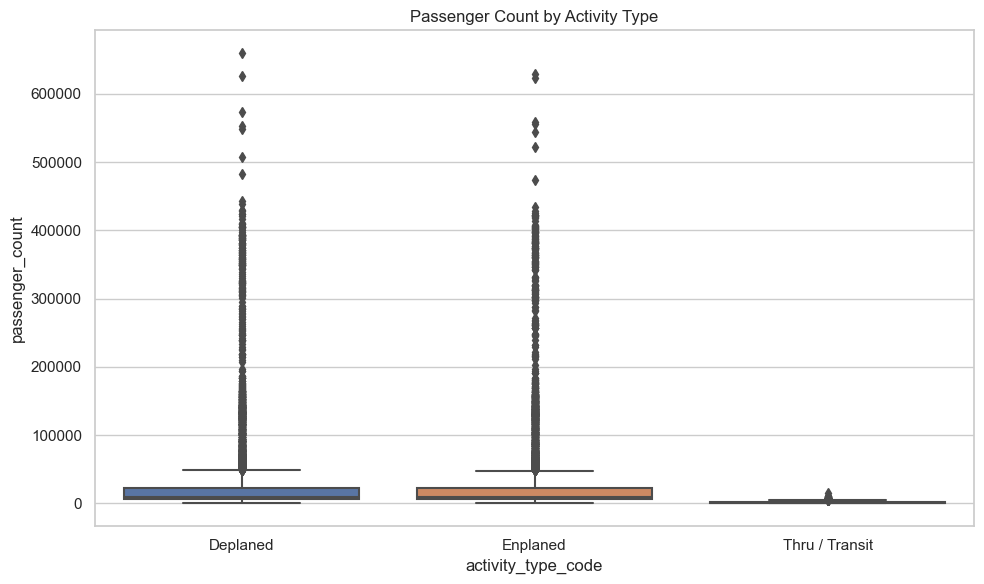

In [19]:
# Box Plot: Passenger Count by Activity Type
plt.figure(figsize=(10, 6))
sns.boxplot(x="activity_type_code", y="passenger_count", data=df)
plt.title('Passenger Count by Activity Type')
plt.tight_layout()
plt.show()

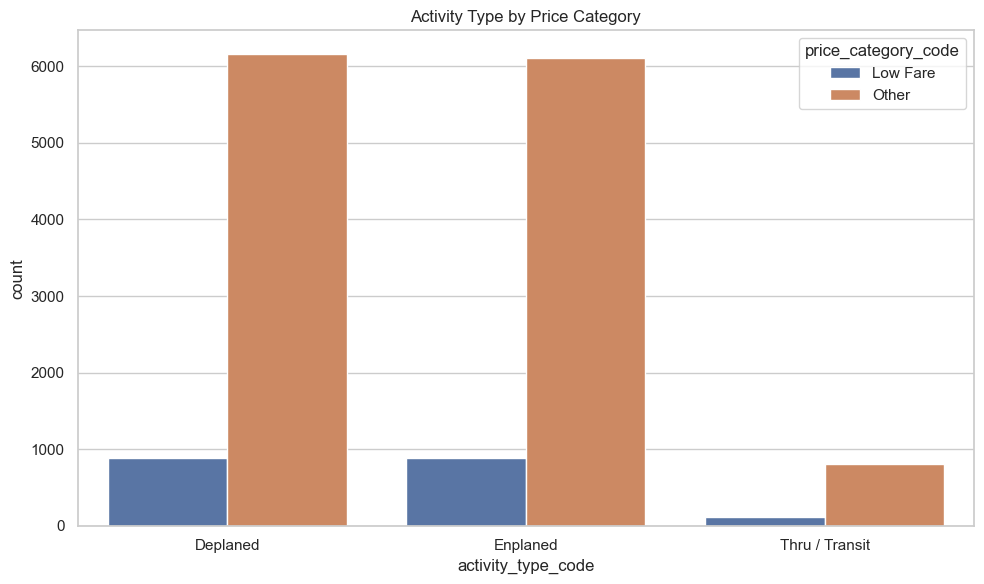

In [20]:
# Categorical Plot: Activity Type by Price Category
plt.figure(figsize=(10, 6))
sns.countplot(x="activity_type_code", hue="price_category_code", data=df)
plt.title('Activity Type by Price Category')
plt.tight_layout()
plt.show()

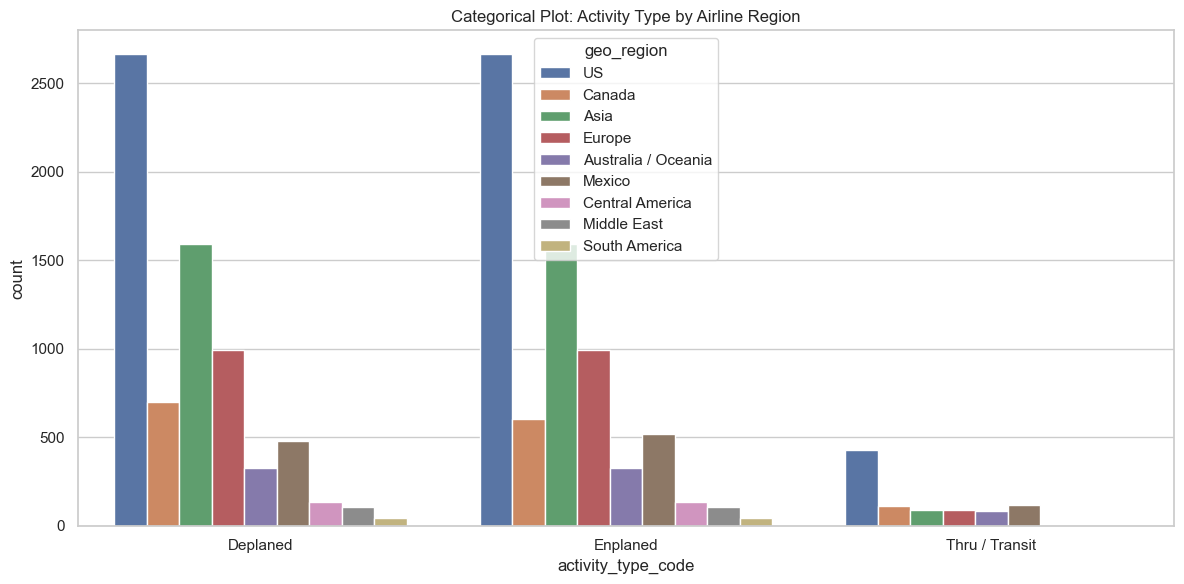

In [22]:
# Categorical Plot: Activity Type by Airline Region
plt.figure(figsize=(12, 6))
sns.countplot(x="activity_type_code", hue="geo_region", data=df)
plt.title('Categorical Plot: Activity Type by Airline Region')
plt.tight_layout()
plt.show()

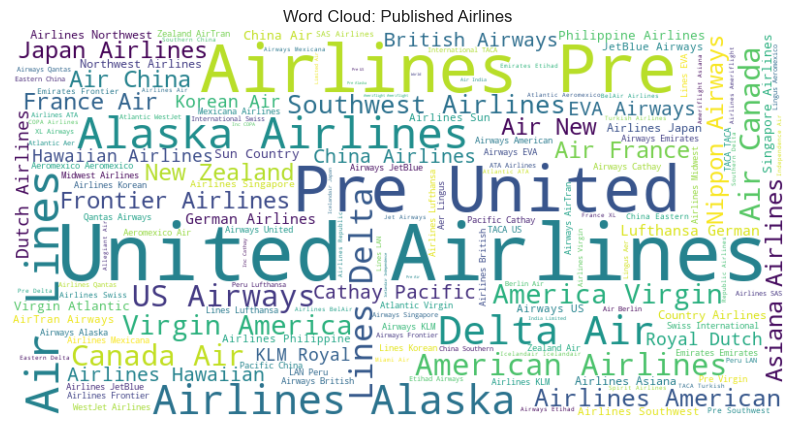

In [33]:
# Combine published airline names into a single string
published_airlines_text = ' '.join(df['published_airline'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(published_airlines_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Published Airlines')
plt.show()


# K-means cluster model

In [9]:
X = df.iloc[:, [13, 14]].values

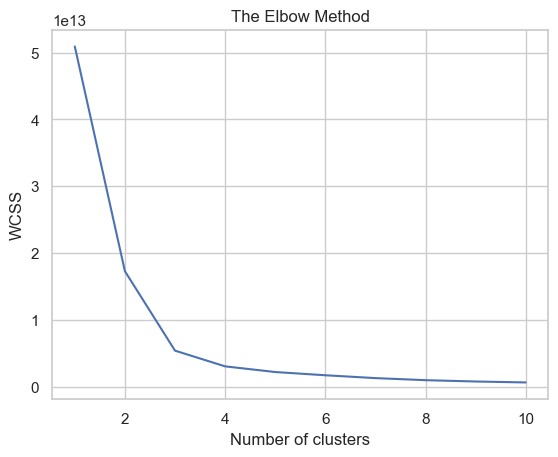

In [37]:
# Draw the elpow graph
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

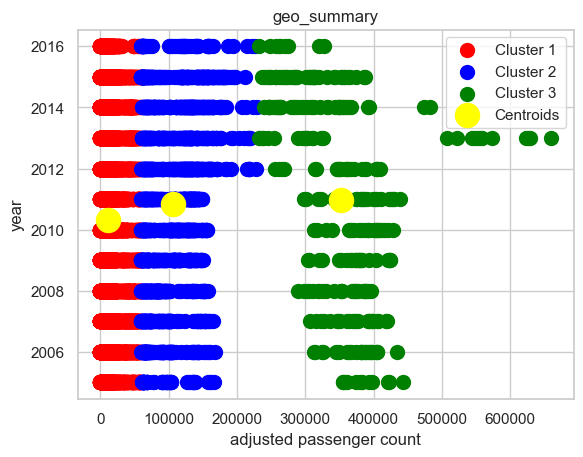

In [42]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('geo_summary')
plt.xlabel('adjusted passenger count')
plt.ylabel('year')
plt.legend()
plt.show()

# Hierarichal cluster model

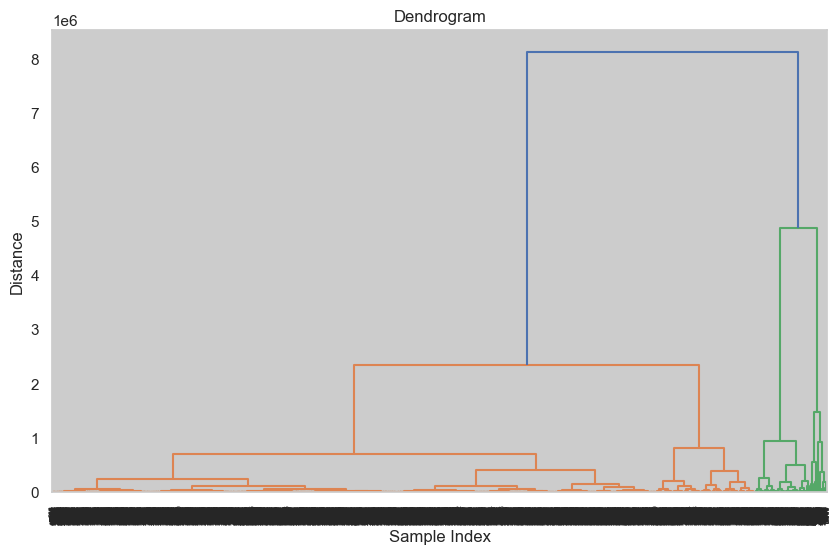

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a linkage matrix using the data
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Text(0.5, 1.0, 'Hierarchical')

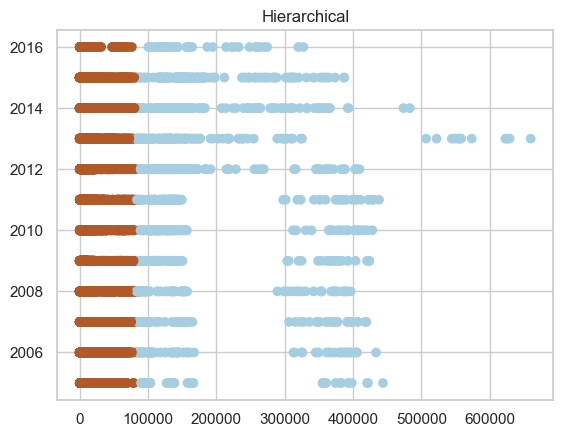

In [47]:
hier = AgglomerativeClustering(n_clusters=2)
y_pred2 = hier.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='Paired')
plt.title("Hierarchical")

# DB Scan cluster model

In [48]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming X contains the relevant features from your data

# Create a DBSCAN instance
eps = 0.5  # Adjust the value based on the distance between data points
min_samples = 5  # Minimum number of points required to form a dense region
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to your data
labels = dbscan.fit_predict(X)

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')


Number of clusters: 0
Number of noise points: 14953


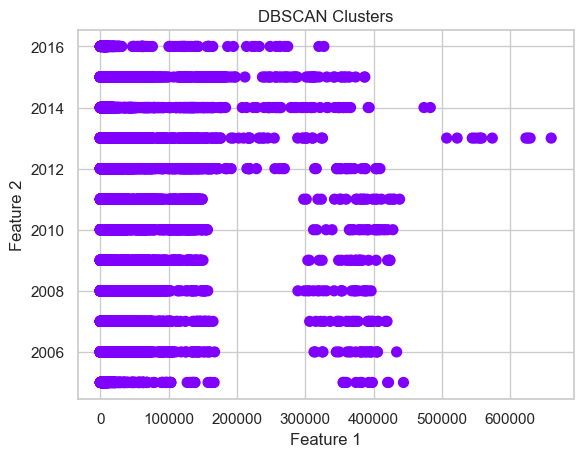

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', marker='o', s=50)
plt.title('DBSCAN Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


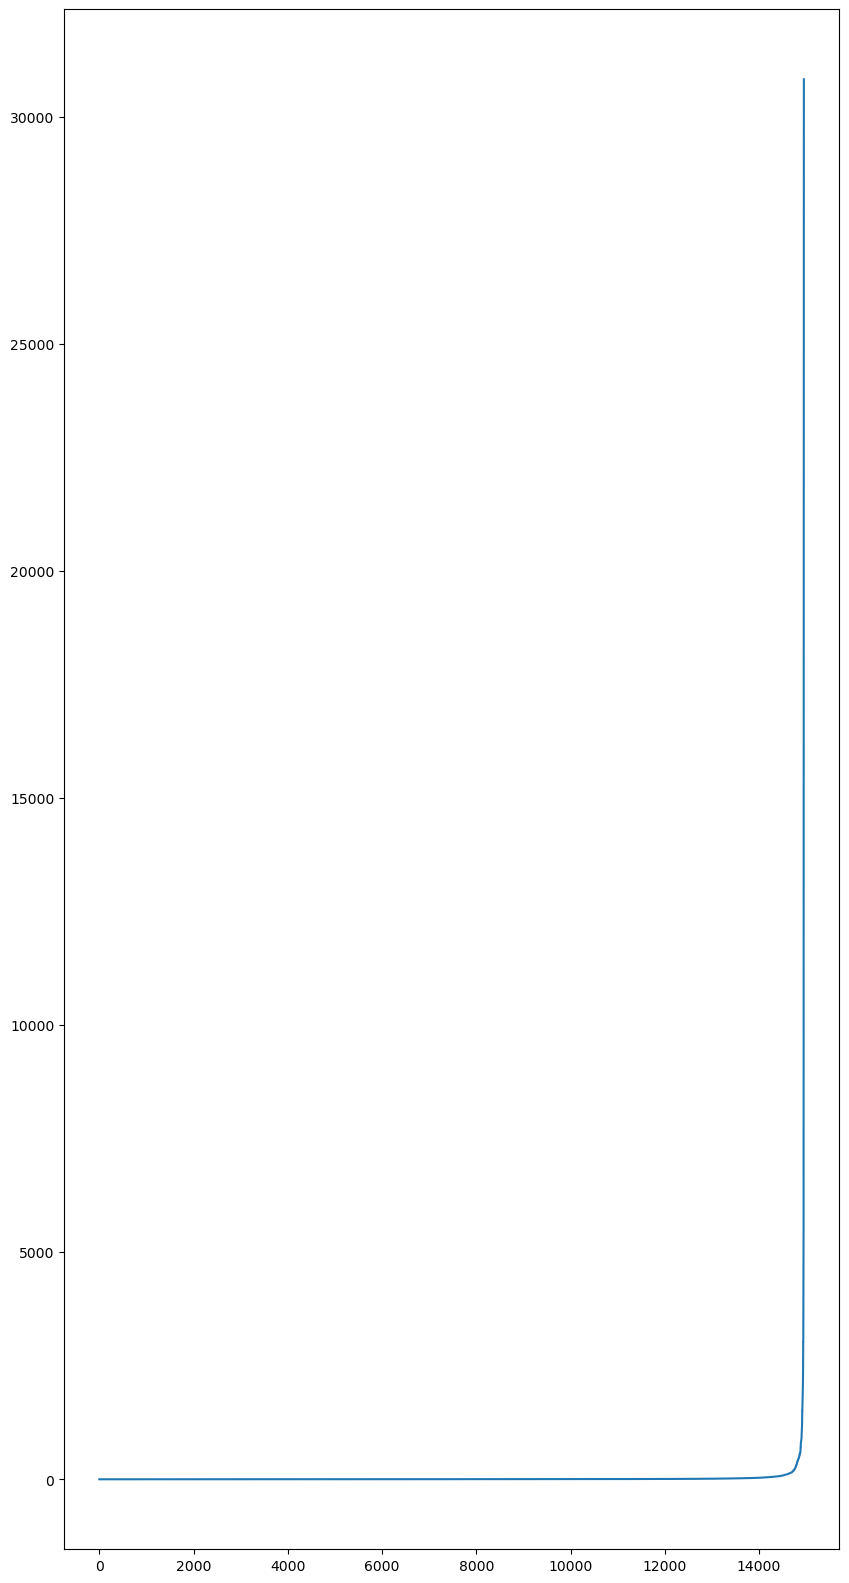

In [10]:
# Draw k-distance graph to choose the best Eps
from sklearn.neighbors import NearestNeighbors  
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 20))  
plt.plot(distances)

Text(0.5, 1.0, 'DBSCAN')

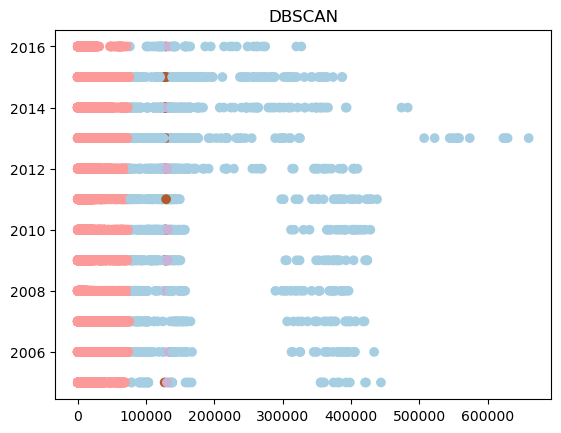

In [20]:
db = DBSCAN(eps=1200, min_samples=50)
db.fit(X)
y_pred3 = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred3, cmap='Paired')
plt.title("DBSCAN")